In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Učitavanje podataka
df = pd.read_csv("german.data", sep=" ", header=None)

headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","Foreign worker","Cost Matrix(Risk)"]
df.columns=headers

label_encoders = {}  # Rečnik za čuvanje label encodera

categorical_columns = ["Status of existing checking account", "Credit history", "Purpose", "Savings account/bonds",
                       "Present employment since", "Personal status and sex", "Other debtors / guarantors",
                       "Property", "Other installment plans", "Housing", "Job", "Telephone", "Foreign worker"]

for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])  
    label_encoders[column] = label_encoder  
X = df.drop("Cost Matrix(Risk)", axis=1)
y = df["Cost Matrix(Risk)"]


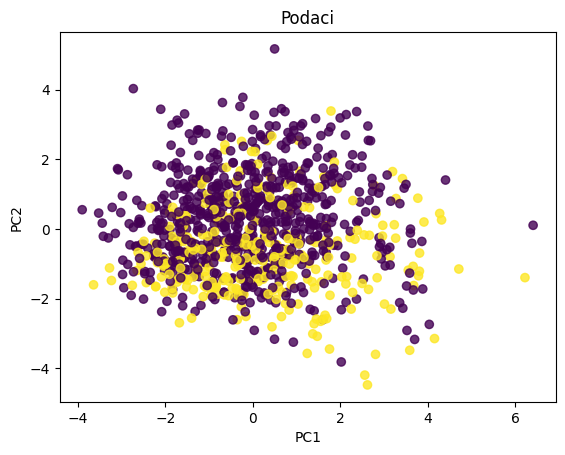

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Normalizacija podataka
normalScaler = StandardScaler()
X_normalized = pd.DataFrame(normalScaler.fit_transform(X))

# PCA za smanjenje dimenzionalnosti na 2 komponente
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Iscrtavanje podataka
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=y, label=y, alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Podaci")
plt.show()


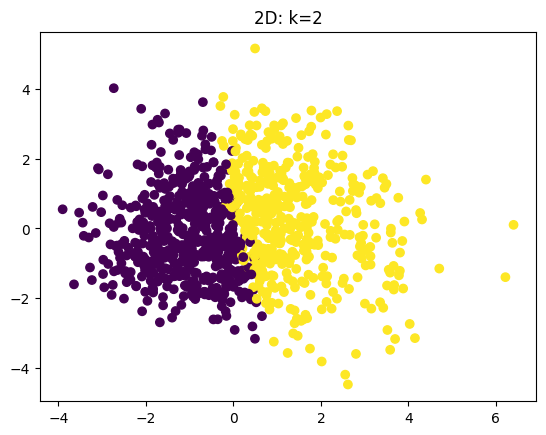

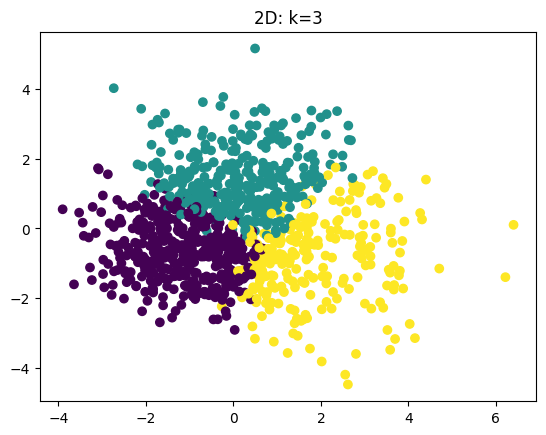

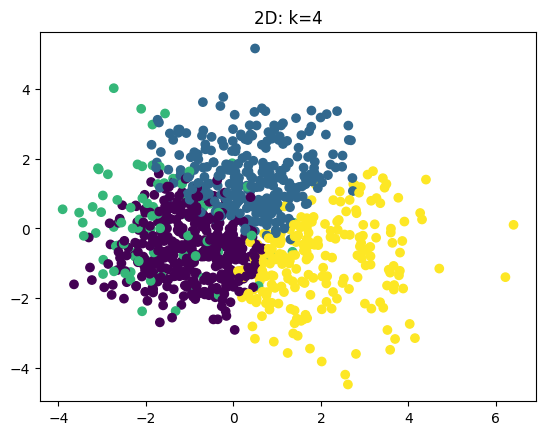

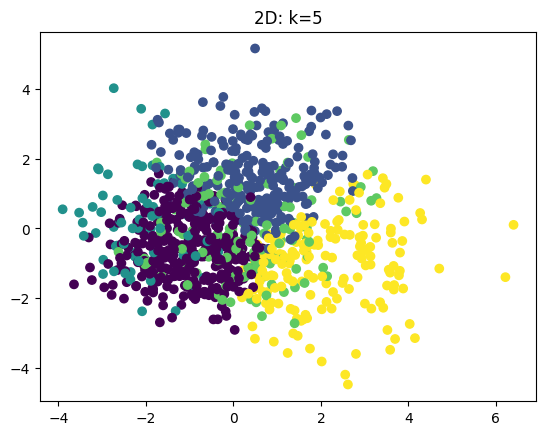

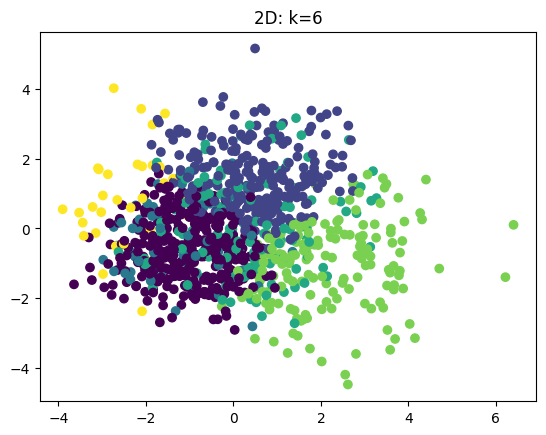

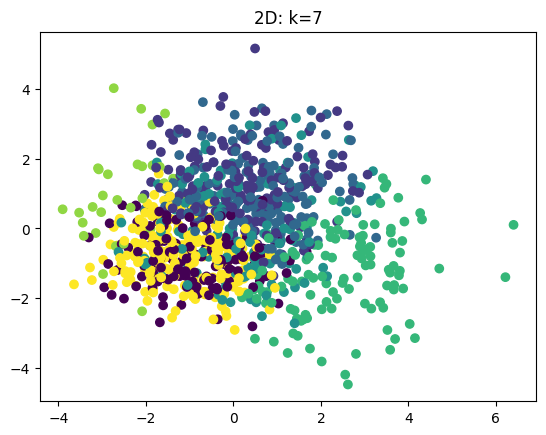

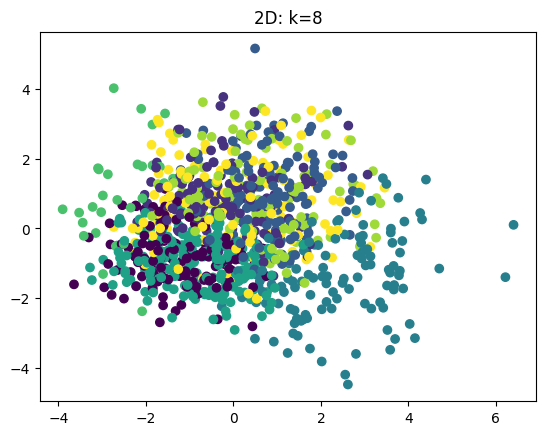

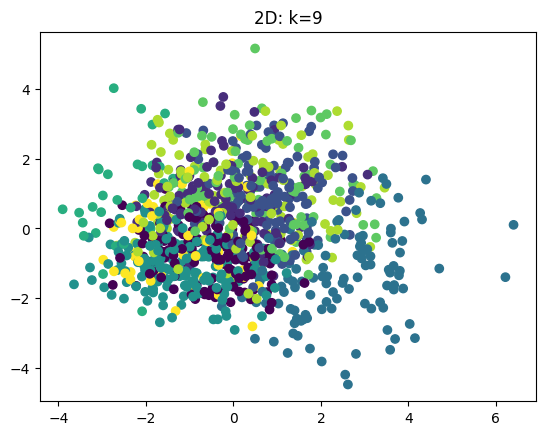

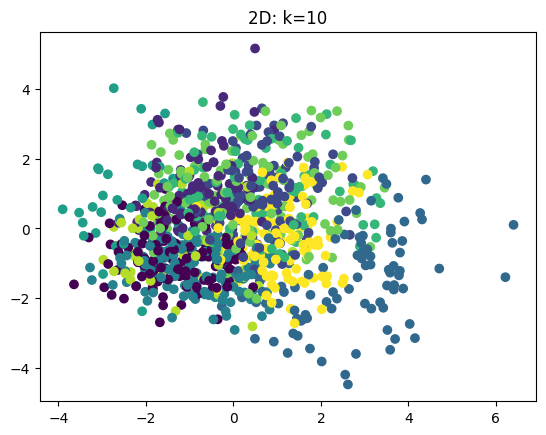

In [3]:

silhouettes = []
sse_scores = []

# Ispitivanje različitih brojeva klastera
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=48, init='k-means++', n_init='auto', max_iter=500)
    kmeans.fit(X_normalized)
    labels = kmeans.predict(X_normalized)

    # Iscrtavanje klastera
    plt.title(f'2D: k={i}')
    plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
    plt.show()

    silhouettes.append(silhouette_score(X_normalized, labels))
    sse_scores.append(round(kmeans.inertia_, 4))



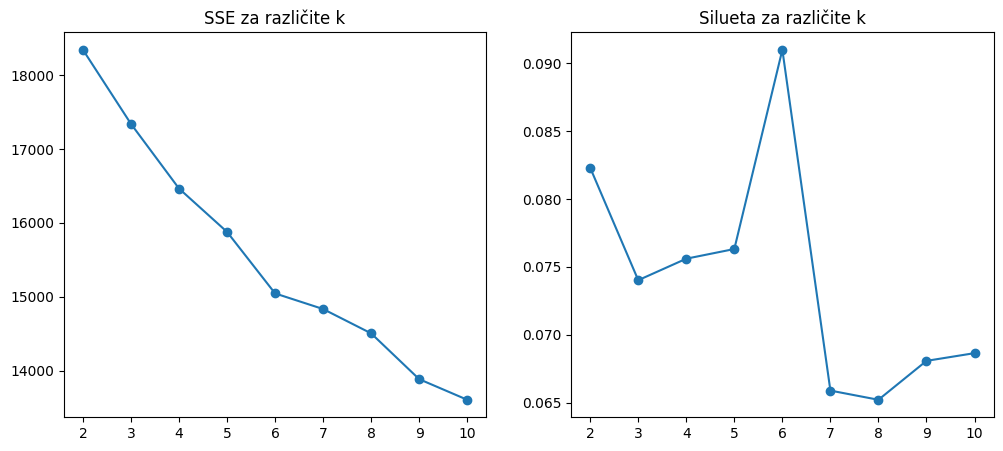

In [4]:
# Prikaži rezultate
fig = plt.figure(figsize=(12, 5))

x = [str(i) for i in range(2, 11)]

fig.add_subplot(1, 2, 1)
y1 = sse_scores
plt.plot(x, y1, marker='o')
plt.title('SSE za različite k')

fig.add_subplot(1, 2, 2)
y2 = silhouettes
plt.plot(x, y2, marker='o')
plt.title('Silueta za različite k')
plt.show()


In [5]:
from sklearn.cluster import DBSCAN

In [6]:
model = DBSCAN(eps=0.1, min_samples=2)

In [7]:
model.fit(X)

DBSCAN(eps=0.1, min_samples=2)

In [9]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [10]:
np.unique(model.labels_)

array([-1])

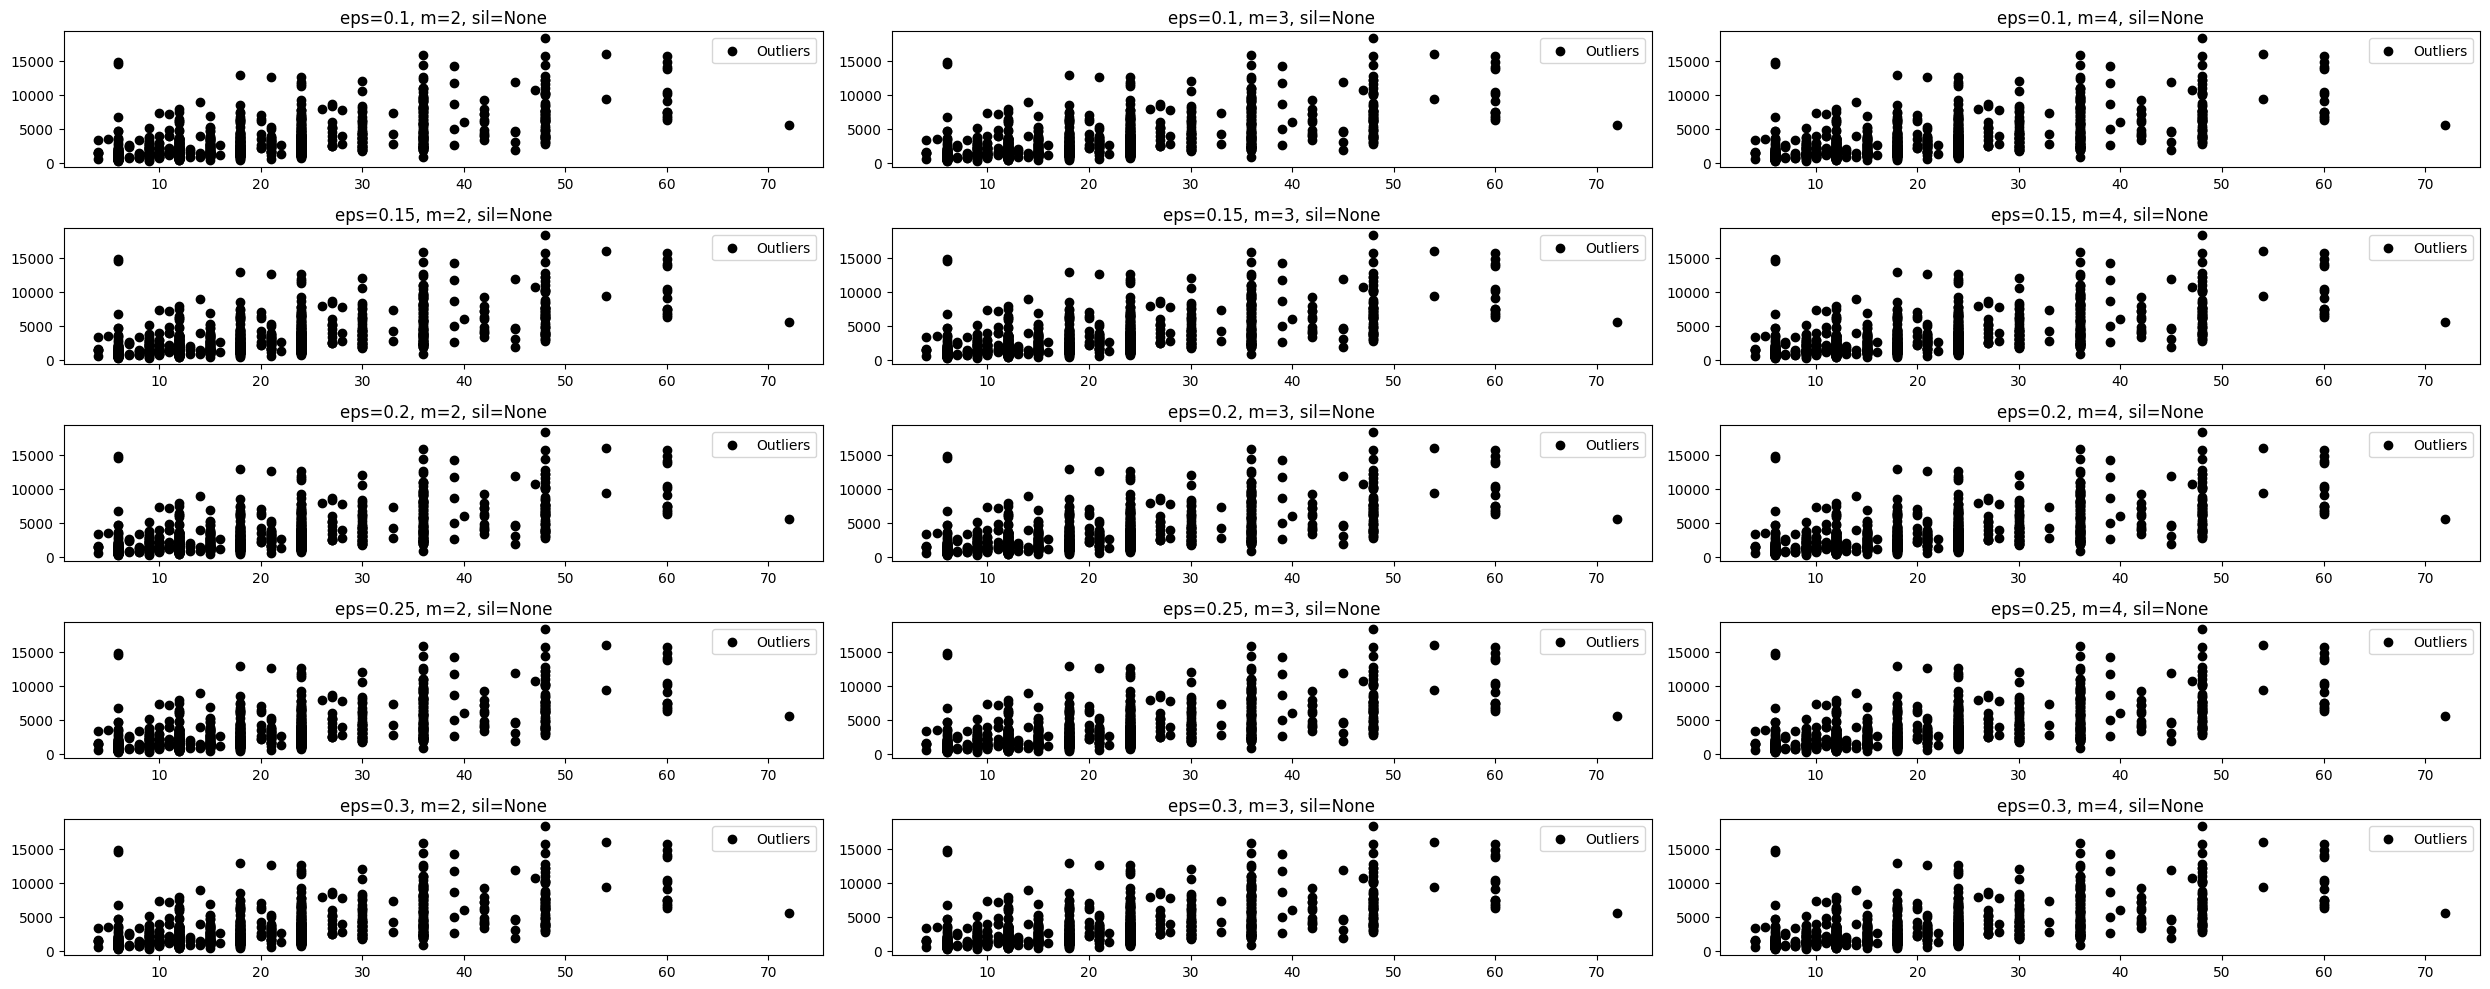

In [11]:
min_samples = 2
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = range(2, 5)
fig = plt.figure(figsize=(25, 10))
idx = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(df)  # Use the entire DataFrame 'df'

        fig.add_subplot(len(eps_values), len(min_samples_values), idx)
        idx += 1

        for cluster_label in np.unique(model.labels_):
            cluster = df[model.labels_ == cluster_label]
            if cluster_label == -1:
                plt.scatter(cluster['Duration in month'], cluster['Credit amount'], color='black', label='Outliers')
            else:
                plt.scatter(cluster['Duration in month'], cluster['Credit amount'], label=f'Cluster {cluster_label}')

        plt.legend()
        if len(np.unique(model.labels_)) == 1:
            s = None
        else:
            s = silhouette_score(df, model.labels_)
        plt.title(f'eps={eps}, m={min_samples}, sil={s}')

plt.tight_layout()
plt.show()
